# Fake News Detector Using Machine Learning and Neural Networks

## This is going to be my first solo project that I will be exploring. I do not know the scope of what I will be doing, however, I just want to explore and learn. I will update this as a work out what the scope of this project will be. Goal is to learn and get more comfortable with machine learning and neural networks. Maybe aim to use pytorch or scikit learn.

### I will be working with Kaggle's Fake News Dataset: https://www.kaggle.com/c/fake-news/data#

Import necessary libraries and dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Read in the data
df = pd.read_csv('data/train.csv')
df.head(5)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


## Explore the Dataset here

In [6]:
# Check for missing values
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

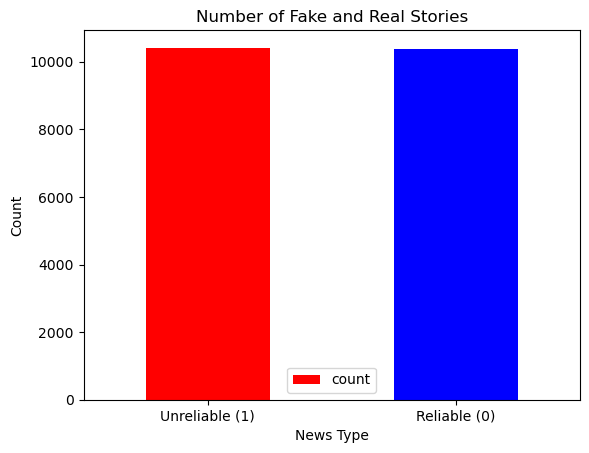

In [7]:
# Help me visualize how many fake and real stories there are with label 1 being unreliable and 0 being reliable
# Make unreliable bar red and reliable bar blue
plot = df['label'].value_counts().plot(kind='bar', title='Number of Fake and Real Stories', legend=True, color=['red', 'blue'])
plot.set_xticklabels(['Unreliable (1)', 'Reliable (0)'], rotation=0)
plt.xlabel('News Type')
plt.ylabel('Count')
plt.show()


## Data Preprocessing


Clean the text and remove elements that are not useful for analysis

In [8]:
# Remove html tags if any
df['text'] = df['text'].str.replace('<[^<]+?>', '')

In [9]:
# Eliminate special characters and punctuation
df['text'] = df['text'].str.replace('[^\w\s]','')

In [10]:
# Remove common words that do not contribute much to the meaning of the text, also known as stop words
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/emmetthintz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
def remove_stopwords(text):
    if isinstance(text, str):
        return " ".join([word for word in text.split() if word.lower() not in stopwords.words('english')])
    else:
        return text
    
df['text'] = df['text'].apply(remove_stopwords)
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: Didn’t Even See Comey’s Letter...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get feeling life circles roundabout rathe...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Truth Might Get Fired October 29, 2016 tension...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed Single US Airstrike...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print Iranian woman sentenced six years prison...,1
